# Count Vectorization and Logistic Regression Model

In [1]:
# Standard data science imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read in X_train, X_test, y_train, y_test

X_train=pd.read_csv('../datasets/X_train.csv')['selftext']
X_test=pd.read_csv('../datasets/X_test.csv')['selftext']
y_train=pd.read_csv('../datasets/y_train.csv')['subreddit']
y_test=pd.read_csv('../datasets/y_test.csv')['subreddit']

In [3]:
# print to quick check on datasets

print(X_train.shape)
pd.DataFrame(X_train).head()

(1364,)


,selftext
0,one of our housekeeper is pretty known for bei...
1,i run a small hotel with a hand operated eleva...
2,tonight i had a couple of obviously homeless f...
3,i m not looking forward into going to work ton...
4,an earlier post today about a lady not underst...


In [4]:
print(X_test.shape)
pd.DataFrame(X_test).head()

(455,)


,selftext
0,my poor coworker who is black but an absolute ...
1,before i begin i want to point out that no one...
2,i ve been working at a restaurant for five yea...
3,mini rant the joy of mood swing at work just h...
4,another tale from the crazy night audit lady t...


In [5]:
print(y_train.shape)
pd.DataFrame(y_train).head()

(1364,)


,subreddit
0,1
1,1
2,1
3,0
4,1


In [6]:
print(y_test.shape)
pd.DataFrame(y_test).head()

(455,)


,subreddit
0,0
1,1
2,0
3,1
4,1


In [7]:
# Model imports

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


## Count Vectorization and Logistic Regression combined into a Pipeline

Running GridSearchCV and tuning the hyperparameters accordingly to optimize the model.

In [8]:
# setting my cv_var as 10

cv_var=10

In [9]:
# Instantiating pipeline for Count Vectorization and Logistic Regression

# Count Vectorizer object will have token pattern = "[a-z]+[']?[a-z]*".
# It will allow words like 'I've' stay as they are.
# It will also remove pure numbers.
# 'english' stop_words removed.

pipe_cvec_logreg = Pipeline([
    ("cvec", CountVectorizer(token_pattern="[a-z]+[']?[a-z]*", lowercase=True, stop_words='english')),
    ("lr", LogisticRegression())
    ])

In [10]:
pipe_params_cvec_logreg = {
    'cvec__max_features': [20, 30, 50],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.2, .25, .3],
    'cvec__ngram_range':[(1,1),(1,2)],
    'lr__penalty':['l1','l2']
}


In [11]:
# Fitting and running GridSearchCV

gs_cvec_logreg = GridSearchCV(pipe_cvec_logreg, param_grid=pipe_params_cvec_logreg, cv=cv_var, n_jobs = -2, verbose=1)
gs_cvec_logreg.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-2)]: Done 720 out of 720 | elapsed:  2.6min finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [12]:
print(gs_cvec_logreg.best_score_)
gs_cvec_logreg.best_params_

0.8973607038123167


{'cvec__max_df': 0.3,
 'cvec__max_features': 50,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'lr__penalty': 'l1'}

In [13]:
gs_cvec_logreg.score(X_train, y_train)

0.9134897360703812

In [14]:
gs_cvec_logreg.score(X_test, y_test)

0.8901098901098901

Further tune hyperparameters to achieve a better score:

In [15]:
pipe_params_cvec_logreg_final = {
    'cvec__max_features': [400, 500, 600],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.3, .5, .7],
    'cvec__ngram_range':[(1,1),(1,2)],
    'lr__penalty':['l1','l2'],
    'lr__C': np.logspace(-2, 0, 10)
}


In [17]:
# Fitting and running GridSearchCV with revised parameters

gs_cvec_logreg_final = GridSearchCV(pipe_cvec_logreg, param_grid=pipe_params_cvec_logreg_final, cv=cv_var, n_jobs = -2,verbose=1)
gs_cvec_logreg_final.fit(X_train, y_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=-2)]: Done  44 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-2)]: Done 194 tasks      | elapsed:   22.4s
[Parallel(n_jobs=-2)]: Done 444 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-2)]: Done 794 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-2)]: Done 1244 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-2)]: Done 1794 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-2)]: Done 2444 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-2)]: Done 3194 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-2)]: Done 4044 tasks      | elapsed: 14.2min
[Parallel(n_jobs=-2)]: Done 4994 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-2)]: Done 6044 tasks      | elapsed: 21.2min
[Parallel(n_jobs=-2)]: Done 7194 tasks      | elapsed: 25.3min
[Parallel(n_jobs=-2)]: Done 7200 out of 7200 | elapsed: 25.3min finished
C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Defa

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('cvec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                           

In [18]:
print(gs_cvec_logreg_final.best_score_)
gs_cvec_logreg_final.best_params_

0.9640762463343109


{'cvec__max_df': 0.5,
 'cvec__max_features': 600,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1),
 'lr__C': 1.0,
 'lr__penalty': 'l1'}

In [19]:
print(f"Train Accuracy: {gs_cvec_logreg_final.score(X_train, y_train)}")

Train Accuracy: 0.9970674486803519


In [20]:
print(f"Test Accuracy: {gs_cvec_logreg_final.score(X_test, y_test)}")

Test Accuracy: 0.9406593406593406


## Predictions and Confusion Matrix

In [21]:
# Generate predictions

preds_cvec_logreg_final = gs_cvec_logreg_final.predict(X_test)

In [22]:
# Import the confusion matrix function.

from sklearn.metrics import confusion_matrix

In [23]:
# Generate a confusion matrix.

confusion_matrix(y_test, preds_cvec_logreg_final)

array([[225,  13],
       [ 14, 203]], dtype=int64)

In [24]:
tn_cvec_logreg, fp_cvec_logreg, fn_cvec_logreg, tp_cvec_logreg = confusion_matrix(y_test, preds_cvec_logreg_final).ravel()

In [25]:
print("True Negatives: %s" % tn_cvec_logreg)
print("False Positives: %s" % fp_cvec_logreg)
print("False Negatives: %s" % fn_cvec_logreg)
print("True Positives: %s" % tp_cvec_logreg)

True Negatives: 225
False Positives: 13
False Negatives: 14
True Positives: 203


In [26]:
# Specificity of test set

spec_cvec_logreg = tn_cvec_logreg/(tn_cvec_logreg+fp_cvec_logreg)

print(f'Specificity: {round(spec_cvec_logreg,3)}')

Specificity: 0.945


In [27]:
# Sensitivity/Recall of test set

sens_cvec_logreg = tp_cvec_logreg/(tp_cvec_logreg+fn_cvec_logreg)

print(f'Sensitivity: {round(sens_cvec_logreg,3)}')

Sensitivity: 0.935


In [28]:
# Precision of test set

prec_cvec_logreg = tp_cvec_logreg/(tp_cvec_logreg+fp_cvec_logreg)

print(f'Precision: {round(prec_cvec_logreg,3)}')

Precision: 0.94


In [29]:
# F1 score of test set

f1_cvec_logreg = 2 * ((prec_cvec_logreg * sens_cvec_logreg)/(prec_cvec_logreg + sens_cvec_logreg))

print(f'F1: {round(f1_cvec_logreg,3)}')

F1: 0.938


## Relationship between Sensitivity and Specificity

In [30]:
# checking predictions based on X_test data, and optimised model
print(len(gs_cvec_logreg_final.predict(X_test)))
gs_cvec_logreg_final.predict(X_test)[0:5]

455


array([0, 1, 0, 1, 1], dtype=int64)

In [31]:
# checking predicted probabilities based on X_test data, and optimised model
print(len(gs_cvec_logreg_final.predict_proba(X_test)))
gs_cvec_logreg_final.predict_proba(X_test)[0:5]

455


array([[9.80675698e-01, 1.93243020e-02],
       [9.14468501e-12, 1.00000000e+00],
       [9.99998338e-01, 1.66241015e-06],
       [8.15417664e-04, 9.99184582e-01],
       [0.00000000e+00, 1.00000000e+00]])

In [32]:
# Creating a dataframe called pred_df that contains:
# 1. The list of true values of our test set.
# 2. The list of predicted probabilities based on our model.

pred_proba = [i[1] for i in gs_cvec_logreg_final.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,'pred_probs':pred_proba})

print(pred_df.shape)
pred_df.head()

(455, 2)


,true_values,pred_probs
0,0,0.019324
1,1,1.000000
2,0,0.000002
3,1,0.999185
4,1,1.000000


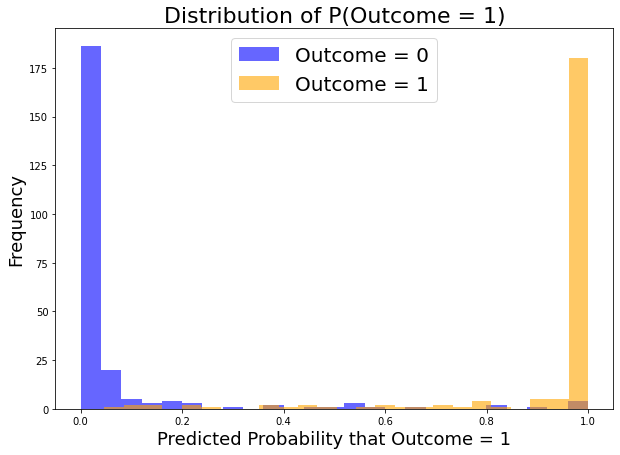

In [33]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20, loc='upper center');

## Receiver Operating Characteristic (ROC) Curve

The Receiver Operating Characteristic curve is a way to visualize the overlap between our positive class and negative class by moving our classification threshold from 0 to 1.


## ROC Area Under Curve (AOC)

The more area under this blue curve is, the better separated our distributions are.


We use the **area under the ROC curve** (abbreviated **ROC AUC** or **AUC ROC**) to quantify the gap between our distributions.

In [34]:
# Import roc_auc_score.
from sklearn.metrics import roc_auc_score

In [35]:
# Calculate score.
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.9900476319560083

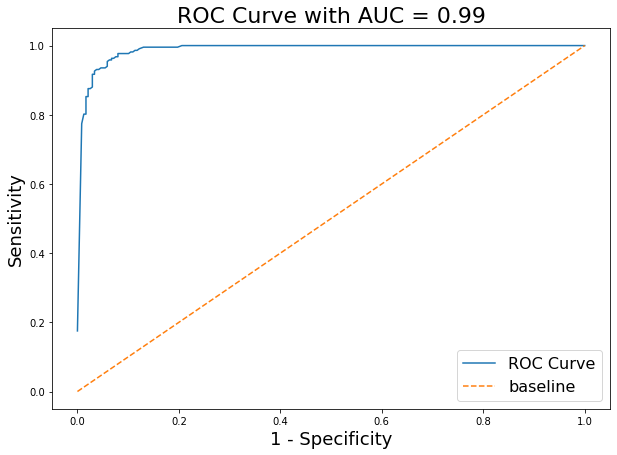

In [36]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f"ROC Curve with AUC = {round(roc_auc_score(pred_df['true_values'], pred_df['pred_probs']),3)}", fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);

## Coefficients

In [37]:
# Restating best parameters obtained through GridSearchCV
gs_cvec_logreg_final.best_params_

{'cvec__max_df': 0.5,
 'cvec__max_features': 600,
 'cvec__min_df': 3,
 'cvec__ngram_range': (1, 1),
 'lr__C': 1.0,
 'lr__penalty': 'l1'}

In [38]:
# Instantiate Count Vectorizer based on best parameters, fitting and transforming 

cvec_logreg_opt_vectorizer = CountVectorizer(stop_words = 'english', max_df = 0.5, max_features = 600, min_df = 3, ngram_range = (1, 1))

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.

X_train_cvec_logreg_opt = cvec_logreg_opt_vectorizer.fit_transform(X_train)

X_test_cvec_logreg_opt = cvec_logreg_opt_vectorizer.transform(X_test)

# Converting to array.
X_train_cvec_logreg_opt= X_train_cvec_logreg_opt.toarray()




In [39]:
# Fit Logistic Regression model to Count Vectorizer processed training data.

cvec_logreg_opt = LogisticRegression(penalty='l2')

cvec_logreg_opt.fit(X_train_cvec_logreg_opt, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# extracting optimum coefs of cvec_logreg model against feature variables,
# with exponentiated coeff rounded to 3 dec places:

cvec_logreg_opt_coefs = pd.DataFrame({'variable':cvec_logreg_opt_vectorizer.get_feature_names(),
                                      'coef':cvec_logreg_opt.coef_.T.ravel(),
                                      'abs_coef':np.abs(cvec_logreg_opt.coef_.T.ravel()),
                                      'exp_coef':np.exp(cvec_logreg_opt.coef_.T.ravel()).round(3),
                                        })

cvec_logreg_opt_coefs.sort_values('exp_coef', inplace=True, ascending=False)


# reseting index, shows clear selection of top 10 and bottom 10 for next lines of code
cvec_logreg_opt_coefs.reset_index(drop=True,inplace=True)


# combining top 10 largest co-ef variables with bottom 10 co-ef variables
cvec_logreg_opt_coefs_top_btm_10 = pd.concat([cvec_logreg_opt_coefs.nlargest(10, 'exp_coef'),cvec_logreg_opt_coefs.nsmallest(10, 'exp_coef')[::-1]])
cvec_logreg_opt_coefs_top_btm_10

,variable,coef,abs_coef,exp_coef
0,desk,1.968422,1.968422,7.159
1,hotel,1.764323,1.764323,5.838
2,room,1.598315,1.598315,4.945
3,breakfast,1.125904,1.125904,3.083
4,guest,1.044155,1.044155,2.841
5,property,0.883387,0.883387,2.419
6,morning,0.803753,0.803753,2.234
7,different,0.800120,0.800120,2.226
8,company,0.727419,0.727419,2.070
9,na,0.687834,0.687834,1.989



Because of the log link function, we interpret a one-unit increase in $X_i$ as follows:

"As $X_i$ increases by 1, I expect $Y$ to increase by a factor of $e^{\beta_1}$."

Example of interpreting exponentiated coefficient:

As word-count of 'desk' increases by 1, probability of target variable, 'subreddit' being category 1: TalesFromYourServer increases by 7.28 times.


#### Plotting visual representation of words with the strongest positive influence and negative influence on classification as Class 1 TalesFromTheFrontDesk, together with relative scale.

Note that the mathematical exp_coef values are more meaningful numerically, but using the unexponentiated coeff better visually represents the relationship.

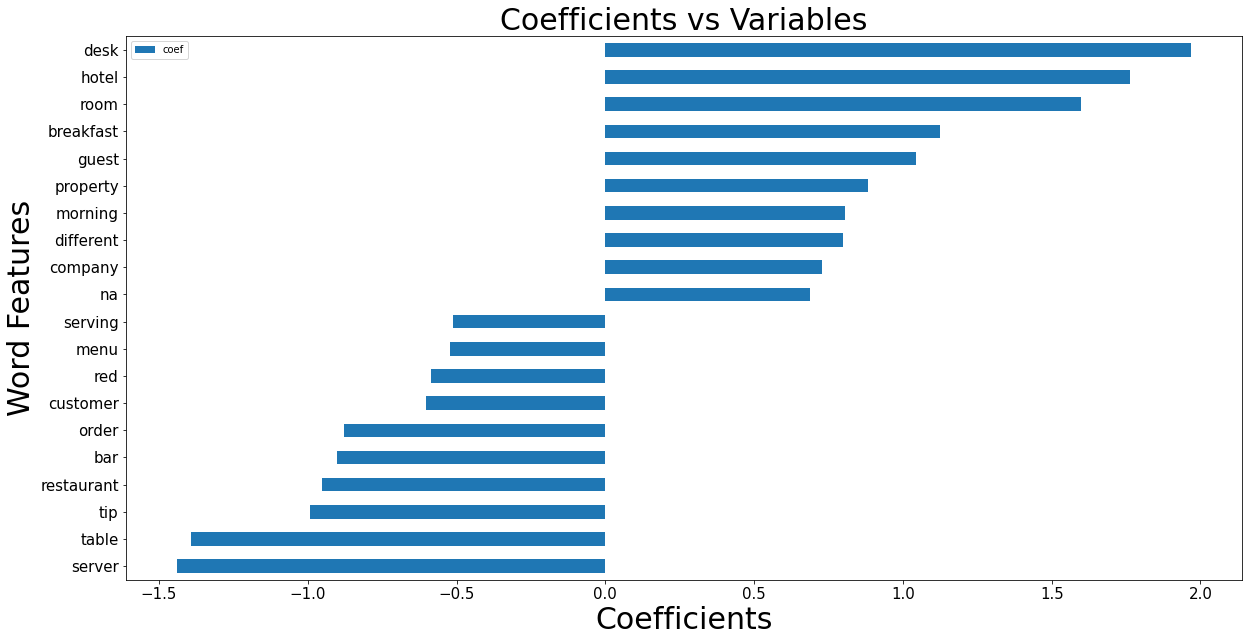

In [41]:
# Plotting top 10 and bottom 10 coefs sorted in descending order to visualize the correlation of word features with the target class 1 - TalesFromYourServer
ax = cvec_logreg_opt_coefs_top_btm_10.sort_values('coef', ascending=True)[['variable','coef']].plot.barh('variable',figsize=(20,10))
ax.set_title("Coefficients vs Variables", fontsize=30)
ax.set_xlabel("Coefficients", fontsize=30)
ax.set_ylabel("Word Features", fontsize=30)
plt.xticks(size=15)
plt.yticks(size=15);

## Count Vectorization and Logisitic Regression Corpus Word Count

In [42]:
# converting X_train_cvec_logreg_opt into DataFrame
X_train_cvec_logreg_opt_df=pd.DataFrame(X_train_cvec_logreg_opt, columns = cvec_logreg_opt_vectorizer.get_feature_names())

In [43]:
# find out how many times each word appear in the corpus by creating a 'Total' row at the end of the dataframe:
X_train_cvec_logreg_opt_df.loc['Total',:]= X_train_cvec_logreg_opt_df.sum(axis=0)
X_train_cvec_logreg_opt_df.loc['Total',:].sort_values(ascending=False)

room     2308.0
guest    1391.0
don      1241.0
hotel    1188.0
know     1181.0
          ...  
tale       62.0
tl         62.0
smoke      62.0
world      62.0
cause      61.0
Name: Total, Length: 600, dtype: float64

In [44]:
X_train_total_cvec_logreg_opt = pd.DataFrame(X_train_cvec_logreg_opt_df.loc['Total',:].sort_values(ascending=False))
print(X_train_total_cvec_logreg_opt.shape)
X_train_total_cvec_logreg_opt.head()

(600, 1)


,Total
room,2308.0
guest,1391.0
don,1241.0
hotel,1188.0
know,1181.0


In [45]:
# No. of modelled words fulfilling various appearance count thresholds:

print(len(X_train_total_cvec_logreg_opt.loc[X_train_total_cvec_logreg_opt['Total'] <= 2]))
print(len(X_train_total_cvec_logreg_opt.loc[X_train_total_cvec_logreg_opt['Total'] <= 10]))
print(len(X_train_total_cvec_logreg_opt.loc[X_train_total_cvec_logreg_opt['Total'] <= 50]))
print(len(X_train_total_cvec_logreg_opt.loc[X_train_total_cvec_logreg_opt['Total'] <= 500]))
print(len(X_train_total_cvec_logreg_opt.loc[X_train_total_cvec_logreg_opt['Total'] <= 1000]))
print(len(X_train_total_cvec_logreg_opt.loc[X_train_total_cvec_logreg_opt['Total'] <= 1500]))


0
0
0
552
589
599


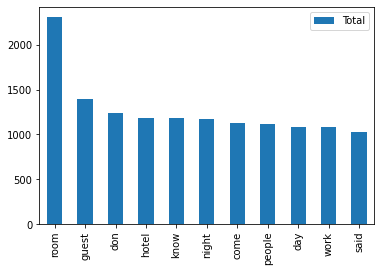

In [46]:
# plot histogram to observe the distribution

X_train_total_cvec_logreg_opt[X_train_total_cvec_logreg_opt.Total > 1000].plot(kind='bar');

## Count Vectorization and Logistic Regression Wordcloud Visualization

In [47]:
# Import Wordcloud 

from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from sklearn.feature_extraction import stop_words


In [48]:
# This wordcloud shows the relative influence of remaining features/words
# in training data left after cleaning and stopword removal, leading to Class 1, TalesFromTheFrontDesk prediction.
# stopwords keyword will remove 'english' stopwords

def wordcloud_gen_func(input_string):

    stopwords = set(stop_words.ENGLISH_STOP_WORDS)
    wordcloud = WordCloud(stopwords=stopwords, background_color="white",
                          contour_width=5, contour_color='firebrick', collocations=False).generate(input_string)

    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()



In [49]:
# instantiating wordcloud_string for visualisation

# converting float in cvec_logreg_opt_coefs['exp_coef'] to int for usage to form wordcloud_string:
cvec_logreg_opt_coefs['exp_coef']=cvec_logreg_opt_coefs['exp_coef'].apply(lambda i: int(i))

# forming wordcloud_string based on all exponentiated coefs of cvec_logreg_opt_coefs

cvec_logreg_exp_coef_wordcloud_string = ''
i = 0

# while loop to keep adding each word with a blank space after it, multiplied by its count:
while i < len(cvec_logreg_opt_coefs['variable']):
    cvec_logreg_exp_coef_wordcloud_string += ((cvec_logreg_opt_coefs['variable'][i]+' ')*cvec_logreg_opt_coefs['exp_coef'][i])
    i += 1

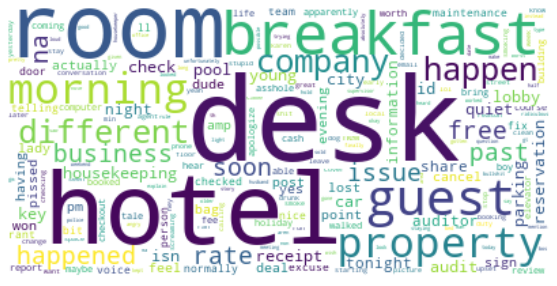

In [50]:
# This is the Count Vectorization and Logistic Regression WordCloud on cvec_logreg_opt_coefs:

wordcloud_gen_func(cvec_logreg_exp_coef_wordcloud_string)